# Linear Regression

- StatQuest Videos:
    - https://youtu.be/PaFPbb66DxQ
    - https://youtu.be/7ArmBVF2dCs

Linear regression involves three core steps:
1.  **Use least-squares** to fit a line to the data.
2.  **Calculate R²** to quantify how well the line fits the data.
3.  **Calculate a p-value for R²** to determine if the relationship is statistically significant.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data used in the video (approximately) ---
mouse_weight = np.array([0.9, 1.8, 2.4, 3.5, 3.9, 4.4, 5.1, 5.6, 6.3])
mouse_size = np.array([1.4, 2.6, 1.9, 3.1, 4.5, 4.0, 4.4, 6.0, 5.5])

### Step 1: Fitting a Line with Least-Squares

The goal is to find the line that best represents the relationship in the data (e.g., predicting mouse size from mouse weight).

*   **Residual:** The distance from a data point to the fitted line.
*   **Least-Squares Method:** The process of finding the line that minimizes the **sum of the squared residuals**.
    1.  Start with an arbitrary line through the data.
    2.  Calculate the residual for each data point.
    3.  Square each residual.
    4.  Sum all the squared residuals.
    5.  Rotate/shift the line and repeat, finding the line position that results in the **least sum of squares**. This is the best-fit line.
*   **Parameters:** The least-squares method estimates the parameters for the line's equation (`y = y-intercept + slope * x`). For a simple line, it estimates two parameters:
    1.  The **y-intercept**.
    2.  The **slope**.

> As the video explains, the goal is to find the line that minimizes the sum of the squared residuals. While the video conceptually shows this as "rotating the line," mathematically we can calculate the slope and intercept directly using the least-squares formulas.

In [2]:
def least_squares_fit(x_values, y_values):
    """
    Calculates the slope and intercept of the least-squares regression line.
    
    Args:
        x_values (np.array): The independent variable data.
        y_values (np.array): The dependent variable data.
        
    Returns:
        tuple: A tuple containing the slope and y-intercept.
    """
    # Calculate the means of x and y
    mean_x = np.mean(x_values)
    mean_y = np.mean(y_values)
    
    # Calculate the terms needed for the slope formula
    numerator = np.sum((x_values - mean_x) * (y_values - mean_y))
    denominator = np.sum((x_values - mean_x)**2)
    
    # Calculate slope (m) and intercept (b)
    slope = numerator / denominator
    intercept = mean_y - (slope * mean_x)
    
    return slope, intercept


# Calculate the slope and intercept of the least-squares regression line
slope, intercept = least_squares_fit(mouse_weight, mouse_size)

print(f"The equation for the line is: y = {intercept:.2f} + {slope:.2f}x")

The equation for the line is: y = 0.61 + 0.82x


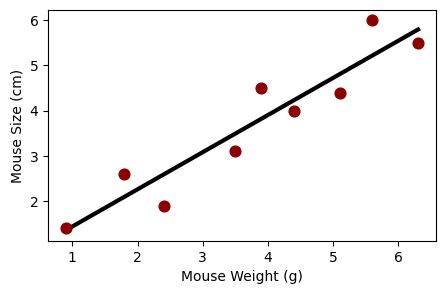

In [3]:
# Generate the predicted y-values using our fitted line
predicted_mouse_size = slope * mouse_weight + intercept

plt.figure(figsize=(5, 3))
plt.scatter(mouse_weight, mouse_size, color='darkred', s=60, zorder=3, label='Original Data')
plt.plot(mouse_weight, predicted_mouse_size, color='black', linewidth=3, label='Least-Squares Fit')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Mouse Size (cm)')
plt.show()

### Step 2: Calculating R² (R-squared)

R² tells us how much of the variation in our data is "explained" by the model.

1.  **Total Variation (Variation around the Mean):**
    *   First, calculate the average of the response variable (e.g., the average mouse size). This is represented by a horizontal line.
    *   Calculate the sum of the squared distances from each data point to this mean line. This is called **SS(mean)**.
    *   The **Var(mean)** is calculated as `SS(mean) / n` (where n is the sample size). This represents the total raw variation in the data before fitting a model.

2.  **Variation Around the Fit:**
    *   Next, use the least-squares fit line.
    *   Calculate the sum of the squared residuals around this fitted line. This is called **SS(fit)**.
    *   The **Var(fit)** is calculated as `SS(fit) / n`. This represents the variation that is *not* explained by the model.

3.  **R² Formula & Interpretation:**
    *   R² is the reduction in variance achieved by using the fitted line instead of just the mean.
    *   **Formula (using variance):** `R² = (Var(mean) - Var(fit)) / Var(mean)`
    *   **Formula (using sum of squares):** `R² = (SS(mean) - SS(fit)) / SS(mean)`
    *   **Interpretation:** R² is the proportion of variation in the response variable (e.g., mouse size) that is explained by the predictor variable (e.g., mouse weight). An R² of 0.6 means 60% of the variation is explained.

#### Important Note on R² and Extra Parameters
*   Adding more parameters to an equation (even useless, random ones) will never make the R² value worse. It can only stay the same or improve due to random chance.
*   This is why we can't just rely on a high R² value; we need to test if it's statistically significant.

In [4]:
def calculate_r_squared(y_original, y_predicted):
    """
    Calculates R-squared, the proportion of variance explained by the model.
    
    This function uses the terminology from the video: SS(mean) and SS(fit).
    
    Args:
        y_original (np.array): The actual data points for the dependent variable.
        y_predicted (np.array): The predicted values from the regression line.
        
    Returns:
        float: The R-squared value.
        tuple: A tuple containing SS(mean) and SS(fit) for later use.
    """
    # Calculate SS(mean): The total variation around the mean.
    # This is the sum of squared differences between each original y-value and the mean of y.
    mean_y = np.mean(y_original)
    ss_mean = np.sum((y_original - mean_y)**2)
    
    # Calculate SS(fit): The variation that remains after fitting the line (residuals).
    # This is the sum of squared differences between each original y-value and its predicted value.
    ss_fit = np.sum((y_original - y_predicted)**2)
    
    # Calculate R-squared
    # Handle the case where ss_mean is zero to avoid division by zero
    if ss_mean == 0:
        return 1.0, (ss_mean, ss_fit)
        
    r_squared = (ss_mean - ss_fit) / ss_mean
    
    return r_squared, (ss_mean, ss_fit)


# Calculate R-squared and other metrics
r_squared, (ss_mean, ss_fit) = calculate_r_squared(mouse_size, predicted_mouse_size)

print(f"SS(mean) - The total variation in mouse size: {ss_mean:.2f}")
print(f"SS(fit) - The unexplained variation (residuals): {ss_fit:.2f}")
print()
print(f"R-squared: {r_squared:.2f}")
print(f"Interpretation: {r_squared*100:.0f}% of the variation in mouse size can be explained by mouse weight.")

SS(mean) - The total variation in mouse size: 19.85
SS(fit) - The unexplained variation (residuals): 2.26

R-squared: 0.89
Interpretation: 89% of the variation in mouse size can be explained by mouse weight.


### Step 3: Calculating a P-value for R²

The p-value tells us how reliable the relationship (quantified by R²) is. We get the p-value from a statistic called **"F"**.

*   **The F-statistic:** F is a ratio that compares the variation explained by the fit to the variation *not* explained by the fit.
    *   `F = (The variation in mouse size explained by weight) / (The variation in mouse size NOT explained by weight)`
    *   A good fit means the variation explained (numerator) is large, and the variation not explained (denominator) is small. This results in a **large F-value**.

*   **The Full F-statistic Equation:**
    *   `F = (SS(mean) - SS(fit)) / (p_fit - p_mean)  /  (SS(fit) / (n - p_fit))`
    *   **Numerator:** The variance explained by the *extra* parameters in the fit.
    *   **Denominator:** The variance not explained by the fit (the residual variance).

*   **Degrees of Freedom:**
    *   The terms `(p_fit - p_mean)` and `(n - p_fit)` are the **degrees of freedom**. They turn the sums of squares into variances.
    *   **p_fit:** The number of parameters in the fitted line (e.g., 2 for a simple line: intercept + slope).
    *   **p_mean:** The number of parameters in the mean line (always 1: the intercept).
    *   **n:** The sample size.

*   **Finding the P-value:**
    1.  Calculate the F-statistic for your original data.
    2.  The p-value is determined by comparing your F-statistic to an **F-distribution**, which is a histogram of F-values you would get from random data.
    3.  **P-value = (number of more extreme values in the distribution) / (all the values in the distribution)**
    4.  A large F-value will be in the tail of the distribution, resulting in a small p-value.

In [5]:
from scipy.stats import f

def calculate_f_statistic(ss_mean, ss_fit, n, p_fit, p_mean=1):
    """
    Calculates the F-statistic to test the significance of the model.
    
    Args:
        ss_mean (float): Sum of squares around the mean.
        ss_fit (float): Sum of squares around the fit (residuals).
        n (int): The number of data points (sample size).
        p_fit (int): The number of parameters in the fitted model.
        p_mean (int): The number of parameters in the mean model (always 1).
        
    Returns:
        float: The calculated F-statistic.
    """
    # The numerator is the variance explained by the extra parameters in the fit.
    # It's the reduction in the sum of squares, divided by the number of extra parameters.
    numerator = (ss_mean - ss_fit) / (p_fit - p_mean)
    
    # The denominator is the variance NOT explained by the fit.
    # It's the remaining sum of squares, divided by the remaining degrees of freedom.
    denominator = ss_fit / (n - p_fit)
    
    # Handle division by zero if the fit is perfect (denominator is 0)
    if denominator == 0:
        return float('inf') # A perfect fit results in an infinite F-statistic

    f_stat = numerator / denominator
    
    return f_stat

def get_p_value_from_f(f_statistic, df_numerator, df_denominator):
    """
    Calculates the p-value from an F-statistic and degrees of freedom.
    
    This uses the F-distribution to find the probability of observing an F-statistic
    as extreme or more extreme than the one calculated, assuming the null hypothesis is true.
    
    Args:
        f_statistic (float): The calculated F-statistic.
        df_numerator (int): Degrees of freedom for the numerator (p_fit - p_mean).
        df_denominator (int): Degrees of freedom for the denominator (n - p_fit).
        
    Returns:
        float: The p-value.
    """
    # The survival function (sf) is 1 - cdf, which gives the area to the right of the value,
    # which is exactly what a p-value is for an F-test.
    p_value = f.sf(f_statistic, df_numerator, df_denominator)
    return p_value

In [7]:
n = len(mouse_weight)
p_fit = 2  # Number of parameters in the fit line (slope + intercept)
p_mean = 1 # Number of parameters in the mean line (just the mean/intercept)

f_statistic = calculate_f_statistic(ss_mean, ss_fit, n, p_fit, p_mean)
print("F-statistic: ", f_statistic)

df_numerator = p_fit - p_mean
df_denominator = n - p_fit

p_value = get_p_value_from_f(f_statistic, df_numerator, df_denominator)
print("P-value: ", p_value)

F-statistic:  54.41179692775554
P-value:  0.0001524512977628955
